The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_test = pd.read_csv('test.tsv', delimiter='\t')
submission = pd.read_csv('sampleSubmission.csv')

In [13]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [66]:
df_train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [111]:
X = df_train['Phrase']
y = df_train['Sentiment']
one_hot_encoded_y = pd.get_dummies(y)
  
X_train, X_val, y_train, y_val = train_test_split(X, one_hot_encoded_y, test_size = 0.2, random_state = 1)

In [75]:
df = df_train.drop(['PhraseId', 'SentenceId'], axis = 1)
df.head()
# df_test.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [69]:
negative_phrases = df[df['Sentiment'] == 0]
negative_text = " ".join(phrase for phrase in negative_phrases['Phrase'])

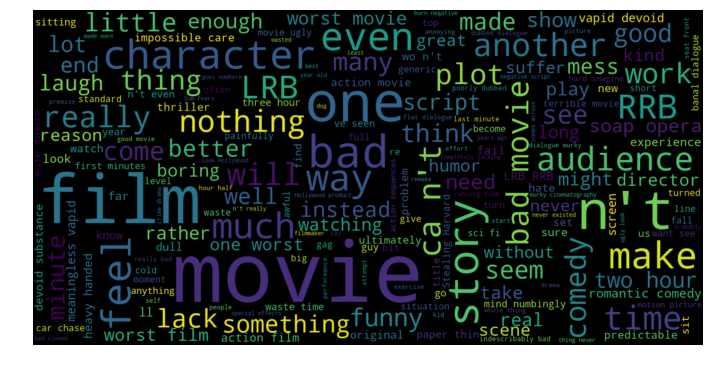

In [70]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
positive_phrases = df[df['Sentiment'] == 4]
positive_text = " ".join(phrase for phrase in negative_phrases['Phrase'])

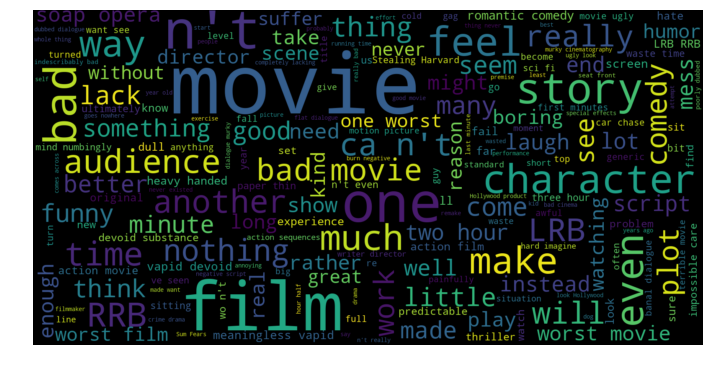

In [77]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# count_vectorizer = CountVectorizer()
count_vectorizer = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
count_vectorizer.fit(df['Phrase'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
len(count_vectorizer.get_feature_names())

94644

In [78]:
sentiments = ['negative', 'some-negative', 'neutral', 'some-positive', 'positive']

df_term_frequency = pd.DataFrame()

for i in range(5):
    matrix = count_vectorizer.transform(df[df['Sentiment'] == i]['Phrase'])
    words = matrix.sum(axis = 0)
    word_frequency = [(word, words[0, i]) for word, i in count_vectorizer.vocabulary_.items()]
    df_term_frequency[sentiments[i]] = list(sorted(word_frequency, key = lambda x: x[1], reverse = True))


In [79]:
df_term_frequency.head()

,negative,some-negative,neutral,some-positive,positive
0,"(the, 3462)","(the, 10885)","(the, 20619)","(the, 12459)","(the, 4208)"
1,"(and, 2549)","(of, 6660)","(of, 12287)","(and, 9180)","(and, 4003)"
2,"(of, 2277)","(and, 6204)","(and, 10241)","(of, 8405)","(of, 3073)"
3,"(to, 1916)","(to, 5571)","(to, 8295)","(to, 5411)","(to, 1568)"
4,"(is, 1372)","(is, 3362)","(in, 5562)","(is, 3489)","(is, 1550)"


In [80]:
filtered_count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 10000)
filtered_count_vectorizer.fit(df_train_1['Phrase'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:
sentiments = ['negative', 'some-negative', 'neutral', 'some-positive', 'positive']

filtered_df_term_frequency = pd.DataFrame()

for i in range(5):
    matrix = filtered_count_vectorizer.transform(df_train_1[df_train_1['Sentiment'] == i]['Phrase'])
    words = matrix.sum(axis = 0)
    word_frequency = [(word, words[0, i]) for word, i in filtered_count_vectorizer.vocabulary_.items()]
    filtered_df_term_frequency[sentiments[i]] = list(sorted(word_frequency, key = lambda x: x[1], reverse = True))

In [46]:
filtered_df_term_frequency.head()

,negative,some-negative,neutral,some-positive,positive
0,"(movie, 793)","(movie, 1463)","(film, 2175)","(film, 1848)","(film, 949)"
1,"(film, 480)","(film, 1281)","(movie, 2054)","(movie, 1344)","(movie, 587)"
2,"(bad, 450)","(like, 942)","(like, 1167)","(good, 974)","(best, 394)"
3,"(like, 332)","(just, 598)","(rrb, 1112)","(story, 664)","(funny, 347)"
4,"(just, 216)","(does, 566)","(story, 954)","(funny, 639)","(good, 334)"


In [107]:
lr = LogisticRegression()
count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 10000)
count_vectorizer_train_features = count_vectorizer.fit_transform(X_train)
count_vectorizer_val_features = count_vectorizer.transform(X_val)

In [112]:
lr.fit(count_vectorizer_train_features, y_train)

ValueError: bad input shape (124848, 5)

In [89]:
lr_predictions = lr.predict(count_vectorizer_val_features)

In [104]:
# sentiments = np.array(y_val).argmax(axis = 1)
# sentiments = np.argmax(y_val, axis = 1)
# predictions = np.argmax(lr_predictions, axis = 1)
# confusion_matrix(sentiments, predictions)
# print(lr_predictions[:100])
print(y_val[:100])

78734     1
126189    0
132845    2
126239    2
30608     1
7997      2
115943    1
65699     2
17825     3
143656    0
18514     4
75943     3
53278     1
3079      3
22752     3
44868     1
15881     1
66293     4
91895     1
121996    2
27405     2
56311     3
42585     2
7935      2
82681     3
87245     2
86526     2
125153    2
95366     3
132457    2
         ..
94838     1
57216     2
29133     4
125993    2
36908     2
108563    1
138449    2
83649     2
75563     3
57039     2
52513     2
59253     2
56705     2
121828    2
130685    2
52389     1
100002    2
11005     2
5602      2
46062     2
100154    2
102019    2
42149     0
105523    2
116599    3
35482     3
74879     1
95360     2
107355    2
83611     2
Name: Sentiment, Length: 100, dtype: int64


In [115]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [114]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 

In [117]:
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)
tv_test_features = tv.transform(phrase_test)

NameError: name 'TfidfVectorizer' is not defined

In [122]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow import set_random_seed
from keras.layers import Dense, LSTM

seed = 0
np.random.seed(seed)
set_random_seed(seed)

Using TensorFlow backend.


In [123]:
    def format_data(train, test, max_features, maxlen):
        train = train.sample(frac=1).reset_index(drop=True)
        train['Phrase'] = train['Phrase'].apply(lambda x: x.lower())
        test['Phrase'] = test['Phrase'].apply(lambda x: x.lower())

        X = train['Phrase']
        test_X = test['Phrase']
        Y = to_categorical(train['Sentiment'].values)

        tokenizer = Tokenizer(num_words = max_features)
        tokenizer.fit_on_texts(list(X))

        X = tokenizer.texts_to_sequences(X)
        X = pad_sequences(X, maxlen=maxlen)
        test_X = tokenizer.texts_to_sequences(test_X)
        # https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do
        test_X = pad_sequences(test_X, maxlen=maxlen)

        return X, Y, test_X

In [120]:
maxlen = 125
max_features = 10000

X, Y, test_X = format_data(train, test, max_features, maxlen)

NameError: name 'train' is not defined

In [121]:
model = Sequential()

model.add(Embedding(max_features, 100, mask_zero = True))
model.add(LSTM(64, dropout = 0.4, recurrent_dropout = 0.4, return_sequences = True))
model.add(LSTM(32, dropout = 0.5, recurrent_dropout = 0.5, return_sequences = False))
model.add(Dense(5, activation = 'softmax'))
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(lr = 0.001),
    metrics = ['accuracy']
)

NameError: name 'Sequential' is not defined

In [ ]:
epochs = 5
batch_size = 32

In [ ]:
model.fit(
    X_train, 
    Y_train, 
    validation_data=(X_val, Y_val),
    epochs=epochs, 
    batch_size=batch_size,
    verbose=1
)